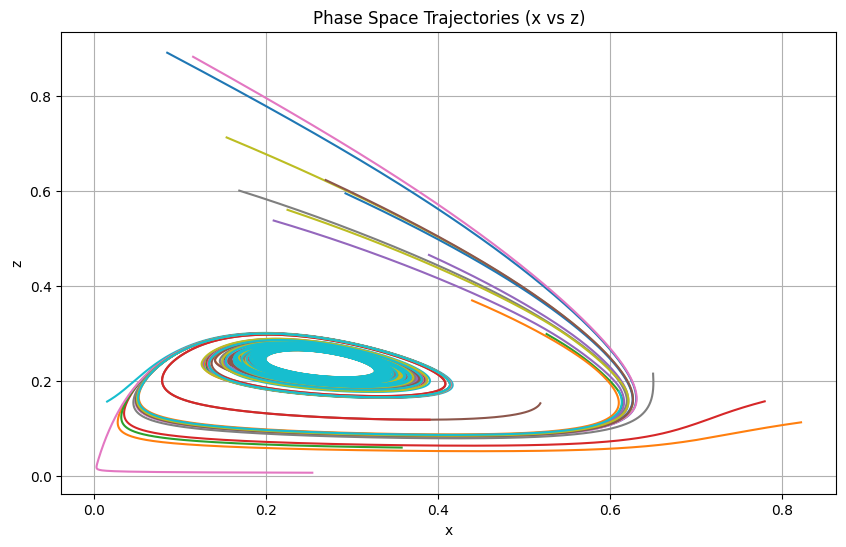

In [12]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Parameters
p = 5.0
c = 1.0
R = 2.0

def system(t, u0, p, c, R):
  
    x, y, z = u0

    dxdt = (
        p * (1.0 + z) * (1.0 - z - x ) * x**2
        - p * (1.0 - z) * ((1.0 - z - x )**2) * x
        - c * (1.0 - z) * x
        + z
    )

    dydt = (
        -p * (1.0 + z) * (1.0 - z - x ) * x**2
        + p * (1.0 - z) * ((1.0 - z - x )**2) * x
        + c * (1.0 - z) * x
        - R * z * (1.0 - z - x )
    )

    dzdt = R * z * (1.0 - z - x ) - z

    return [dxdt, dydt, dzdt]


t_span = (0.0, 300.0)        
t_eval = np.linspace(*t_span, 50000)  

initial_conditions = np.random.dirichlet([1, 1, 1], size=20)

plt.figure(figsize=(10, 6))
for ic in initial_conditions:
    sol = solve_ivp(system, t_span, ic, args=(p, c, R), t_eval=t_eval)
    plt.plot(sol.y[0],  sol.y[2], label=f'IC: {ic}')

plt.xlabel('x')
plt.ylabel('z')
plt.title('Phase Space Trajectories (x vs z)')
plt.grid()
plt.show()




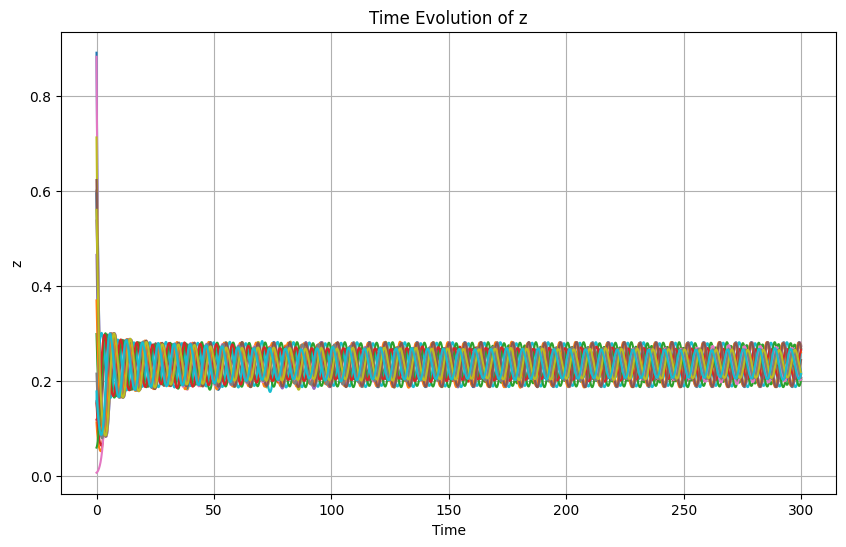

In [13]:
plt.figure(figsize=(10, 6))
for ic in initial_conditions:
    sol = solve_ivp(system, t_span, ic, args=(p, c, R), t_eval=t_eval)
    plt.plot(t_eval,  sol.y[2], label=f'IC: {ic}')
plt.xlabel('Time')
plt.ylabel('z')
plt.title('Time Evolution of z')
plt.grid()
plt.show()
